In [39]:
#Sentiment Analysis

In [1]:
!pip install vaderSentiment

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Initialize VADER so we can use it later
sentimentAnalyser = SentimentIntensityAnalyzer()

In [3]:
import pandas as pd
pd.options.display.max_colwidth = 400

In [6]:
data_df = pd.read_csv('data/shakespear.csv')
data_df.head()

Dataline      Play  PlayerLinenumber ActSceneLine         Player  \
0         1  Henry IV               NaN          NaN            NaN   
1         2  Henry IV               NaN          NaN            NaN   
2         3  Henry IV               NaN          NaN            NaN   
3         4  Henry IV               1.0        1.1.1  KING HENRY IV   
4         5  Henry IV               1.0        1.1.2  KING HENRY IV   

                                                                                         PlayerLine  
0                                                                                             ACT I  
1                                                                      SCENE I. London. The palace.  
2  Enter KING HENRY, LORD JOHN OF LANCASTER, the EARL of WESTMORELAND, SIR WALTER BLUNT, and others  
3                                                            So shaken as we are, so wan with care,  
4                                                        Find we a time for frighted peace to pant,

In [7]:
def calculate_sentiment(text):
    # Run VADER on the text
    scores = sentimentAnalyser.polarity_scores(text)
    # Extract the compound score
    compound_score = scores['compound']
    # Return compound score
    return compound_score

In [8]:
calculate_sentiment('I like the Marvel movies')

0.6486

In [11]:
# Apply the function to every row in the "PlayerLine" column and output the results into a new column "sentiment_score"
data_df['sentiment_score'] = data_df['PlayerLine'].apply(calculate_sentiment)

In [12]:
#Let’s sort the DataFrame and examine the top 10 values with the highest compound sentiment.

In [13]:
data_df.sort_values(by='sentiment_score', ascending=False)[:10]

Dataline                      Play  PlayerLinenumber ActSceneLine  \
68865      68866  A Midsummer nights dream               4.0       5.1.30   
55522      55523        Loves Labours Lost             341.0      5.2.721   
80816      80817                Richard II              10.0       5.1.82   
67711      67712  A Midsummer nights dream               9.0       2.2.56   
20173      20174      Antony and Cleopatra              12.0       3.2.16   
101995    101996      Troilus and Cressida              72.0      4.5.189   
51772      51773                 King Lear               5.0       4.4.31   
91410      91411               The Tempest               4.0        1.1.6   
80583      80584                Richard II              41.0      4.1.200   
14210      14211  Alls well that ends well               1.0        3.3.2   

                    Player  \
68865              THESEUS   
55522                BIRON   
80816      KING RICHARD II   
67711               HERMIA   
20173   DOMITIUS ENOBARBUS   
101995           AGAMEMNON   
51772             CORDELIA   
91410            Boatswain   
80583      KING RICHARD II   
14210                 DUKE   

                                                PlayerLine  sentiment_score  
68865      Joy, gentle friends! joy and fresh days of love           0.9656  
55522      Greater than great, great, great, great Pompey!           0.9647  
80816   Ay, hand from hand, my love, and heart from heart.           0.9638  
67711            But, gentle friend, for love and courtesy           0.9595  
20173       But he loves Caesar best, yet he loves Antony:           0.9578  
101995    From heart of very heart, great Hector, welcome.           0.9522  
51772    But love, dear love, and our aged father's right:           0.9517  
91410       Heigh, my hearts! cheerly, cheerly, my hearts!           0.9515  
80583          Your care is gain of care, by new care won:           0.9493  
14210    Great in our hope, lay our best love and credence           0.9468

In [14]:
#Let’s sort the DataFrame and examine the 10 data with the lowest compound sentiment.

In [15]:
data_df.sort_values(by='sentiment_score', ascending=True)[:10]

Dataline                      Play  PlayerLinenumber ActSceneLine  \
52028     52029                 King Lear              56.0      4.6.202   
28443     28444                Coriolanus              40.0      5.6.153   
69156     69157  A Midsummer nights dream              85.0      5.1.299   
44522     44523                 King John              15.0      3.1.115   
6880       6881           Henry VI Part 2              20.0       1.4.61   
6845       6846           Henry VI Part 2              11.0       1.4.32   
79996     79997                Richard II              23.0      3.2.184   
68094     68095  A Midsummer nights dream               8.0       3.2.60   
82714     82715               Richard III              30.0       2.2.99   
95961     95962           Timon of Athens             144.0      4.3.484   

                   Player                                      PlayerLine  \
52028           KING LEAR       Then, kill, kill, kill, kill, kill, kill!   
28443    All Conspirators               Kill, kill, kill, kill, kill him!   
69156             Pyramus                    Now die, die, die, die, die.   
44522           CONSTANCE        War! war! no peace! peace is to me a war   
6880                 YORK      But him outlive, and die a violent death.'   
6845               Spirit       But him outlive, and die a violent death.   
79996  BISHOP OF CARLISLE    And fight and die is death destroying death,   
68094              HERMIA    So should a murderer look, so dead, so grim.   
82714              RIVERS  Drown desperate sorrow in dead Edward's grave,   
95961               TIMON  But thieves do lose it: steal no less for this   

       sentiment_score  
52028          -0.9855  
28443          -0.9794  
69156          -0.9661  
44522          -0.9600  
6880           -0.9587  
6845           -0.9587  
79996          -0.9578  
68094          -0.9479  
82714          -0.9460  
95961          -0.9442

In [20]:
# Read in text file
text = open("data/t8.shakespeare.txt").read()
# Replace line breaks with spaces
text = text.replace('\n', ' ')

In [21]:
import nltk
nltk.download('punkt')
nltk.sent_tokenize(text)

[nltk_data] Downloading package punkt to C:\Users\Manisha
[nltk_data]     Bagora\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['This is the 100th Etext file presented by Project Gutenberg, and is presented in cooperation with World Library, Inc., from their Library of the Future and Shakespeare CDROMS.',
 'Project Gutenberg often releases Etexts that are NOT placed in the Public Domain!!',
 'Shakespeare  *This Etext has certain copyright implications you should read!',
 '*  <<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION.',
 'ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY.',
 'PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>  *Project Gutenberg is proud to cooperate with The World Library* in the presentation of The Complete Works of William Shakespeare for your r

In [22]:
for number, sentence in enumerate(nltk.sent_tokenize(text)):
    print(number, sentence)

0 This is the 100th Etext file presented by Project Gutenberg, and is presented in cooperation with World Library, Inc., from their Library of the Future and Shakespeare CDROMS.
1 Project Gutenberg often releases Etexts that are NOT placed in the Public Domain!!
2 Shakespeare  *This Etext has certain copyright implications you should read!
3 *  <<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION.
4 ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY.
5 PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>  *Project Gutenberg is proud to cooperate with The World Library* in the presentation of The Complete Works of William Shakespeare for your reading for

In [23]:
#Make data frame

In [24]:
# Break text into sentences
sentences = nltk.sent_tokenize(text)

# Make empty list
sentence_scores = []
# Get each sentence and sentence number, which is what enumerate does
for number, sentence in enumerate(sentences):
    # Use VADER to calculate sentiment
    scores = sentimentAnalyser.polarity_scores(sentence)
    # Make dictionary and append it to the previously empty list
    sentence_scores.append({'sentence': sentence, 'sentence_number': number+1, 'sentiment_score': scores['compound']})

In [25]:
pd.DataFrame(sentence_scores)

sentence  \
0                                                                                                                                                This is the 100th Etext file presented by Project Gutenberg, and is presented in cooperation with World Library, Inc., from their Library of the Future and Shakespeare CDROMS.   
1                                                                                                                                                                                                                                             Project Gutenberg often releases Etexts that are NOT placed in the Public Domain!!   
2                                                                                                                                                                                                                                                   Shakespeare  *This Etext has certain copyright implications you should read!   
3                                                                                                           *  <<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION.   
4                                                                                                                                               ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY.   
...                                                                                                                                                                                                                                                                                                                          ...   
96044                                                                                                                                                                                                                                          Ay me, I fell, and yet do question make   What I should do again for such a sake.   
96045  'O, that infected moisture of his eye,   O, that false fire which in his cheek so glowed,   O, that forced thunder from his heart did fly,   O, that sad breath his spongy lungs bestowed,   O, all that borrowed motion, seeming owed,   Would yet again betray the fore-betrayed,   And new pervert a reconciled maid.'   
96046                                                                                               THE END    <<THIS ELECTRONIC VERSION OF THE COMPLETE WORKS OF WILLIAM SHAKESPEARE IS COPYRIGHT 1990-1993 BY WORLD LIBRARY, INC., AND IS PROVIDED BY PROJECT GUTENBERG ETEXT OF ILLINOIS BENEDICTINE COLLEGE WITH PERMISSION.   
96047                                                                                                                                           ELECTRONIC AND MACHINE READABLE COPIES MAY BE DISTRIBUTED SO LONG AS SUCH COPIES (1) ARE FOR YOUR OR OTHERS PERSONAL USE ONLY, AND (2) ARE NOT DISTRIBUTED OR USED COMMERCIALLY.   
96048                                                                                                                                           PROHIBITED COMMERCIAL DISTRIBUTION INCLUDES BY ANY SERVICE THAT CHARGES FOR DOWNLOAD TIME OR FOR MEMBERSHIP.>>    End of this Etext of The Complete Works of William Shakespeare   

       sentence_number  sentiment_score  
0                    1           0.0000  
1                    2           0.0000  
2                    3           0.3382  
3                    4           0.0000  
4                    5           0.0000  
...                ...              ...  
96044            96045           0.0000  
96045            96046          -0.9325  
96046            96047           0.0000  
960

In [26]:
#Let’s examine the 10 most negative sentences.

In [27]:
# Assign DataFrame to variable red_df
red_df = pd.DataFrame(sentence_scores)

# Sort by the column "sentiment_score" and slice for first 10 values
red_df.sort_values(by='sentiment_score')[:10]

sentence  \
32483  But that the guilt of murder bucklers thee,     And I should rob the deathsman of his fee,     Quitting thee thereby of ten thousand shames,     And that my sovereign's presence makes me mild,     I would, false murd'rous coward, on thy knee     Make thee beg pardon for thy passed speech     And say it was thy mother that thou meant'st,     That thou thyself was born in bastardy;     And, afte...   
41461  Over thy wounds now do I prophesy     (Which like dumb mouths do ope their ruby lips     To beg the voice and utterance of my tongue)     A curse shall light upon the limbs of men;     Domestic fury and fierce civil strife     Shall cumber all the parts of Italy;     Blood and destruction shall be so in use,     And dreadful objects so familiar,     That mothers shall but smile when they behol...   
16418  The King himself     Of his wings destitute, the army broken,     And but the backs of Britons seen, an flying,     Through a strait lane- the enemy, full-hearted,     Lolling the tongue with slaught'ring, having work     More plentiful than tools to do't, struck down     Some mortally, some slightly touch'd, some falling     Merely through fear, that the strait pass was damm'd     With dead m...   
68976                                                                                                                                                                                                                                                                Fear and be slain-no worse can come to fight;     And fight and die is death destroying death,     Where fearing dying pays death servile breath.   
27164  Treason and murder ever kept together,     As two yoke-devils sworn to either's purpose,     Working so grossly in a natural cause     That admiration did not whoop at them;     But thou, 'gainst all proportion, didst bring in     Wonder to wait on treason and on murder;     And whatsoever cunning fiend it was     That wrought upon thee so preposterously       Hath got the voice in hell for ex...   
39701  Hadst not thou been by,     A fellow by the hand of nature mark'd,     Quoted and sign'd to do a deed of shame,     This murder had not come into my mind;     But, taking note of thy abhorr'd aspect,     Finding thee fit for bloody villainy,     Apt, liable to be employ'd in danger,     I faintly broke with thee of Arthur's death;     And thou, to be endeared to a king,     Made it no conscien...   
45911                                                                                                                                                                                                                                                                                         I'll put't in proof,        And when I have stol'n upon these sons-in-law,      Then kill, kill, kill, kill, kill, kill!   
482                                                      129   Th' expense of spirit in a waste of shame   Is lust in action, and till action, lust   Is perjured, murd'rous, bloody full of blame,   Savage, extreme, rude, cruel, not to trust,   Enjoyed no sooner but despised straight,   Past reason hunted, and no sooner had   Past reason hated as a swallowed bait,   On purpose laid to make the taker mad.   
68932                                                                                                                                                                                                                                                                                                                      Cry woe, destruction, ruin, and decay-     The worst is death, and death will have his day.   
38752                                                                       I have but this to say-       That he is not only plagued for her sin,     But God hath made her sin and her the plague     On this removed issue, plagued for her     And with her plague; her sin his injury,     Her injury

In [28]:
#Let’s examine the 10 most positive sentences.

In [38]:
# Sort by the column "sentiment_score," this time in descending order, and slice for first 10 values
red_df.sort_values(by='sentiment_score', ascending=False)[:10]

sentence  \
1000   My dearest madam,     Let not your hate encounter with my love,     For loving where you do; but if yourself,     Whose aged honour cites a virtuous youth,     Did ever in so true a flame of liking     Wish chastely and love dearly that your Dian     Was both herself and Love; O, then, give pity     To her whose state is such that cannot choose     But lend and give where she is sure to lose; ...   
47548                                                                                                                                                                                            By heart you love her, because your heart cannot come by     her; in heart you love her, because your heart is in love with     her; and out of heart you love her, being out of heart that you     cannot enjoy her.   
86247                                   But, worthy Hector,     She is a theme of honour and renown,     A spur to valiant and magnanimous deeds,     Whose present courage may beat down our foes,     And fame in time to come canonize us;     For I presume brave Hector would not lose     So rich advantage of a promis'd glory     As smiles upon the forehead of this action     For the wide world's revenue.   
134    Duty so great, which wit so poor as mine   May make seem bare, in wanting words to show it;   But that I hope some good conceit of thine   In thy soul's thought (all naked) will bestow it:   Till whatsoever star that guides my moving,   Points on me graciously with fair aspect,   And puts apparel on my tattered loving,   To show me worthy of thy sweet respect,     Then may I dare to boast how ...   
164    For whether beauty, birth, or wealth, or wit,   Or any of these all, or all, or more   Entitled in thy parts, do crowned sit,   I make my love engrafted to this store:   So then I am not lame, poor, nor despised,   Whilst that this shadow doth such substance give,   That I in thy abundance am sufficed,   And by a part of all thy glory live:     Look what is best, that best I wish in thee,     ...   
26439                                                                               quoth-a- we shall               [Singing]                Do nothing but eat and make good cheer,               And praise God for the merry year;               When flesh is cheap and females dear,                 And lusty lads roam here and there,                   So merrily,                 And ever among so merrily.   
59963                                                                                                                                                                                        But, gentle friend, for love and courtesy     Lie further off, in human modesty;     Such separation as may well be said     Becomes a virtuous bachelor and a maid,     So far be distant; and good night, sweet friend.   
87758                                                                                              Understand more clear,     What's past and what's to come is strew'd with husks     And formless ruin of oblivion;     But in this extant moment, faith and troth,     Strain'd purely from all hollow bias-drawing,     Bids thee with most divine integrity,     From heart of very heart, great Hector, welcome.   
47521  No, my complete master; but to jig off a tune at the tongue's     end, canary to it with your feet, humour it with turning up your     eyelids, sigh a note and sing a note, sometime through the     throat, as if you swallowed love with singing love, sometime     through the nose, as if you snuff'd up love by smelling love,     with your hat penthouse-like o'er the shop of your eyes, with     y...   
38402  Nor shall this peace sleep with her; but as when     The bird of wonder dies, the maiden phoenix     Her ashes new create another heir     As great in admiration as herself,     So shall she leave her blessedness to one-     When heaven shall call her from this cloud of darkness-     Who fr

In [30]:
#Make a Sentiment Plot

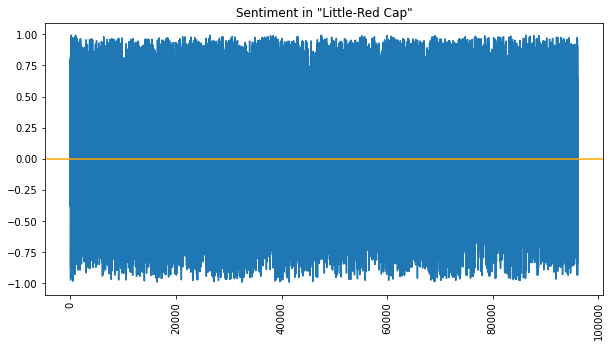

In [32]:
import matplotlib.pyplot as plt

ax = red_df['sentiment_score'].plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Little-Red Cap"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');

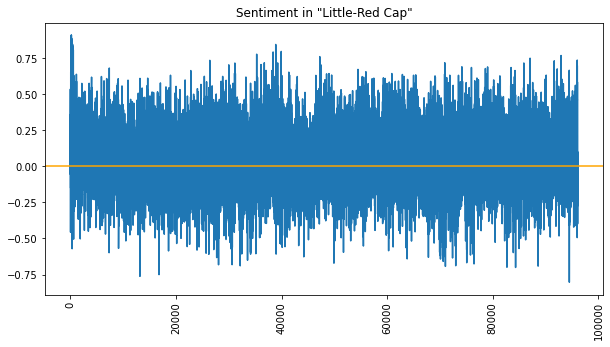

In [33]:
# Get averages for a rolling window, then plot
red_df.rolling(5)['sentiment_score'].mean().plot(x='sentence_number', y='sentiment_score', kind='line',
                        figsize=(10,5), rot=90, title='Sentiment in "Little-Red Cap"')

# Plot a horizontal line at 0
plt.axhline(y=0, color='orange', linestyle='-');